<a href="https://colab.research.google.com/github/kacpercierpiak/AED_LAB/blob/main/AED_L_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ALGORYTMY I EKSPLORACJA DANYCH**
# *LAB4 - Uczenie z nadzorem*

In [49]:
import requests, zipfile, io
rootPath = './LAB4'
url='https://archive.ics.uci.edu/ml/machine-learning-databases/00341/HAPT%20Data%20Set.zip'
r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall(rootPath)


##Zadanie 1

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
X_train = np.genfromtxt(rootPath+'/Train/X_train.txt',delimiter=' ')
y_train = np.genfromtxt(rootPath+'/Train/y_train.txt',delimiter=' ')
X_test = np.genfromtxt(rootPath+'/Test/X_test.txt',delimiter=' ')
y_test = np.genfromtxt(rootPath+'/Test/y_test.txt',delimiter=' ')


##Zadanie 2
Zbuduj modele predykcyjne na podstawie następujących algorytmów zakładając domyślne parametry:

###SVM

In [51]:
from sklearn import svm, metrics
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
svm_pred = clf.predict(X_test)

Accuracy: 0.9519291587602783


###KNN

In [155]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

### DecisionTree

In [41]:
from sklearn import tree
dtree = tree.DecisionTreeClassifier()
dtree.fit(X_train, y_train)
tree_pred = dtree.predict(X_test)

Accuracy: 0.8115117014547755


###RandomForest

In [45]:
from sklearn.ensemble import RandomForestClassifier
rforest=RandomForestClassifier()
rforest.fit(X_train, y_train)
rforest_pred = rforest.predict(X_test)

Accuracy: 0.90955091714105


##Zadanie 3
Na podstawie zdefiniowanych metryk oceny klasyfikatorów oceń skuteczność klasyfikacji
algorytmów z zadania 2

###SVM

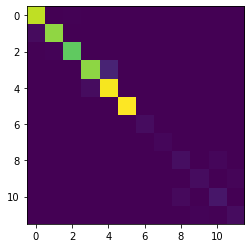

Accuracy:  0.9519291587602783
Recall:  0.8560427418375562
F1:  0.8600533686689769
AUC:  0.18280325785172089


In [117]:
conf = metrics.confusion_matrix(y_test, svm_pred)
plt.imshow(conf, interpolation='nearest')
plt.show()
print("Accuracy: ",metrics.accuracy_score(y_test, svm_pred))
print("Recall: ", metrics.recall_score(y_test, svm_pred,average='macro'))
print("F1: ", metrics.f1_score(y_test, svm_pred,average='macro'))
fpr, tpr, thresholds = metrics.roc_curve(y_test, svm_pred, pos_label=2)
print("AUC: ",metrics.auc(fpr, tpr) )

###KNN

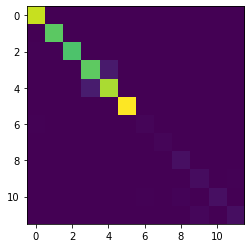

Accuracy: 0.954233409610984
Recall:  0.8544472899770152
F1:  0.8464810954858923
AUC:  0.20051083216716992


In [157]:
conf = metrics.confusion_matrix(y_test, knn_pred)
plt.imshow(conf, interpolation='nearest')
plt.show()
print("Accuracy:",metrics.accuracy_score(y_test, knn_pred))
print("Recall: ", metrics.recall_score(y_test, knn_pred ,average='macro'))
print("F1: ", metrics.f1_score(y_test, knn_pred,average='macro'))
fpr, tpr, thresholds = metrics.roc_curve(y_test, knn_pred, pos_label=2)
print("AUC: ",metrics.auc(fpr, tpr) )

### DecisionTree


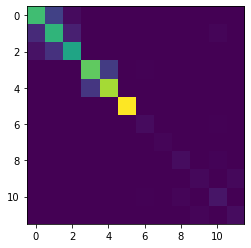

Accuracy: 0.8115117014547755
Recall:  0.7260412687500216
F1:  0.7294845065622765
AUC:  0.19163982165920684


In [116]:
conf = metrics.confusion_matrix(y_test, tree_pred)
plt.imshow(conf, interpolation='nearest')
plt.show()
print("Accuracy:",metrics.accuracy_score(y_test, tree_pred))
print("Recall: ", metrics.recall_score(y_test, tree_pred ,average='macro'))
print("F1: ", metrics.f1_score(y_test, tree_pred,average='macro'))
fpr, tpr, thresholds = metrics.roc_curve(y_test, tree_pred, pos_label=2)
print("AUC: ",metrics.auc(fpr, tpr) )

###RandomForest

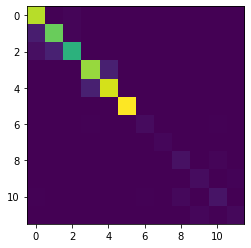

Accuracy: 0.90955091714105
Recall:  0.8075711775393676
F1:  0.8160415019669736
AUC:  0.19142482490585508


In [127]:
conf = metrics.confusion_matrix(y_test, rforest_pred)
plt.imshow(conf, interpolation='nearest')
plt.show()
print("Accuracy:",metrics.accuracy_score(y_test, rforest_pred))
print("Recall: ", metrics.recall_score(y_test, rforest_pred ,average='macro'))
print("F1: ", metrics.f1_score(y_test, rforest_pred,average='macro'))
fpr, tpr, thresholds = metrics.roc_curve(y_test, rforest_pred, pos_label=2)
print("AUC: ",metrics.auc(fpr, tpr))

##Zadanie 4
Dokonaj wyboru najlepszego algorytmu klasyfikacji na podstawie kros-walidacji (CV) dla 5
podprób. Jako rezultat zwróć następujące parametry:
- Wartości średniej z wyników klasyfikacji
- Średniego odchylenia standardowego z wyników klasyfikacji

In [ ]:
from sklearn.model_selection import KFold 
X = np.concatenate([X_train, X_test])
y = np.concatenate([y_train, y_test])
kf = KFold(n_splits=5) 
kf.get_n_splits(X)

###SVM

In [146]:
acc_arr = []

for train_index, test_index in kf.split(X):       
     clf = svm.SVC(kernel='linear')
     clf.fit(X[train_index], y[train_index])
     tmp_pred = clf.predict(X[test_index]) 
     acc_arr.append(metrics.accuracy_score(y[test_index], tmp_pred)) 
print("Avarage accuracy",np.average(acc_arr))     
print("Std: ", np.std(acc_arr)) 


Avarage accuracy 0.9730993779847207
Std:  0.0047999238463292265


###kNN

In [158]:
acc_arr = []

for train_index, test_index in kf.split(X):   
     knn_model = KNeighborsClassifier()
     knn_model.fit(X[train_index], y[train_index])
     tmp_pred = knn_model.predict(X[test_index]) 
     acc_arr.append(metrics.accuracy_score(y[test_index], tmp_pred)) 
print("Avarage accuracy",np.average(acc_arr))     
print("Std: ", np.std(acc_arr)) 

Avarage accuracy 0.9451010277593422
Std:  0.006785704433843984


Decision Tree

In [159]:
acc_arr = []

for train_index, test_index in kf.split(X):   
     dtree = tree.DecisionTreeClassifier()
     dtree.fit(X[train_index], y[train_index])
     tmp_pred = dtree.predict(X[test_index]) 
     acc_arr.append(metrics.accuracy_score(y[test_index], tmp_pred)) 
print("Avarage accuracy",np.average(acc_arr))     
print("Std: ", np.std(acc_arr)) 

Avarage accuracy 0.905481899585672
Std:  0.010827261347169976


Random Forest

In [160]:
acc_arr = []

for train_index, test_index in kf.split(X):   
     rforest=RandomForestClassifier()
     rforest.fit(X[train_index], y[train_index])
     tmp_pred = rforest.predict(X[test_index])
     acc_arr.append(metrics.accuracy_score(y[test_index], tmp_pred)) 
print("Avarage accuracy",np.average(acc_arr))     
print("Std: ", np.std(acc_arr)) 

Avarage accuracy 0.9607471301667989
Std:  0.004700915882018353


###Podsumowanie
SVM oraz Random forest mają podobne wyniki dokładności oraz odchylenia standardowego. SVM wykonuje się znacznie szybciej dlatego też został uznany za najlepszy algorytm na podstawie CV